In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

wine = pd.read_csv("Datasets/winequality-red4_7.csv")

X = wine[["alcohol", "pH", "citric_acid", "total_sulfur_dioxide"]].to_numpy()

y = wine.quality.to_numpy()

In [17]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")


np.shape(U) = (252, 4)
np.shape(sigma) = (4,)
np.shape(Vt) = (4, 4) 



In [18]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")


A == U * sigma_mat * Vt: True 



In [19]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

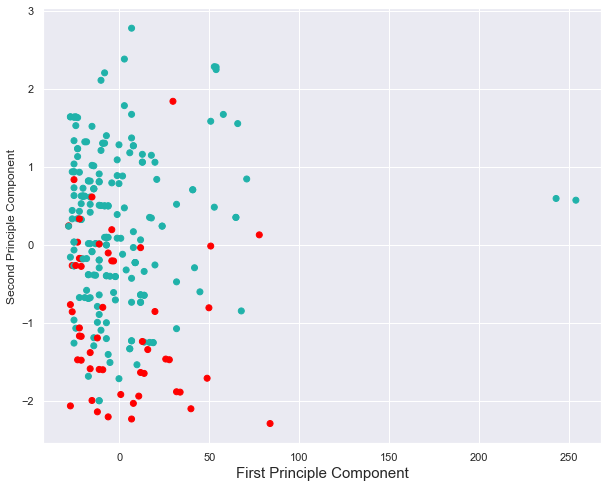

In [20]:
def colors(y):
    if y == 4:
        return "red"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()

In [21]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")


pca.explained_variance_ratio_ = [0.43136936 0.27685848 0.23568894 0.05608322]
per_var = [43.14 27.69 23.57  5.61] 



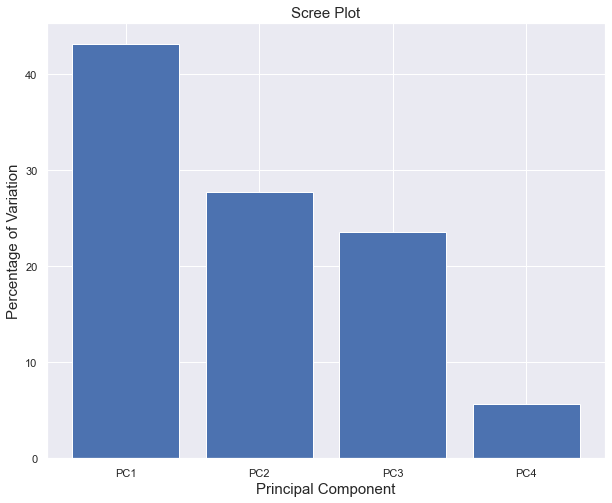

In [22]:
labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [23]:
features = list(set(wine.columns) - {"quality"})

pd.DataFrame(data = pca.components_, columns = labels, index = features)


ValueError: Shape of passed values is (4, 4), indices imply (11, 4)

In [24]:
pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

,PC1,PC2,PC3,PC4
0,-1.366932,-1.380193,0.530208,-0.391341
1,-1.130176,-1.809234,0.692165,-0.326781
2,1.027172,0.879900,1.910121,0.778424
3,-0.947251,-1.906988,1.179785,0.062329
4,0.306767,-1.326648,0.681304,-0.122417
...,...,...,...,...
247,-1.179023,0.167161,-0.249136,-0.255994
248,-0.473910,0.055982,0.547468,0.312533
249,0.894492,-0.336142,-0.491091,-0.267810
250,-1.074837,-0.719382,0.185905,0.220581


In [26]:
projected_df = pd.concat([pca_df, wine.quality], axis = 1)
projected_df


,PC1,PC2,PC3,PC4,quality
0,-1.366932,-1.380193,0.530208,-0.391341,7
1,-1.130176,-1.809234,0.692165,-0.326781,7
2,1.027172,0.879900,1.910121,0.778424,7
3,-0.947251,-1.906988,1.179785,0.062329,4
4,0.306767,-1.326648,0.681304,-0.122417,7
...,...,...,...,...,...
247,-1.179023,0.167161,-0.249136,-0.255994,7
248,-0.473910,0.055982,0.547468,0.312533,7
249,0.894492,-0.336142,-0.491091,-0.267810,7
250,-1.074837,-0.719382,0.185905,0.220581,7


In [27]:
projected_df["color"] = c
projected_df

,PC1,PC2,PC3,PC4,quality,color
0,-1.366932,-1.380193,0.530208,-0.391341,7,lightseagreen
1,-1.130176,-1.809234,0.692165,-0.326781,7,lightseagreen
2,1.027172,0.879900,1.910121,0.778424,7,lightseagreen
3,-0.947251,-1.906988,1.179785,0.062329,4,red
4,0.306767,-1.326648,0.681304,-0.122417,7,lightseagreen
...,...,...,...,...,...,...
247,-1.179023,0.167161,-0.249136,-0.255994,7,lightseagreen
248,-0.473910,0.055982,0.547468,0.312533,7,lightseagreen
249,0.894492,-0.336142,-0.491091,-0.267810,7,lightseagreen
250,-1.074837,-0.719382,0.185905,0.220581,7,lightseagreen


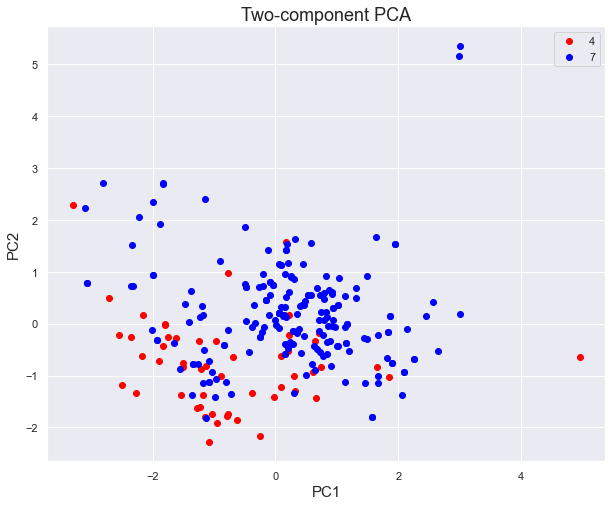

In [30]:
targets = [4, 7]
colors = ["red", "blue"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['quality'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()